In [2]:
from policies import Trajectory, p_s_from_rollouts, p_sa_from_rollouts, sr_from_rollouts, average_reward_from_rollouts
from aggregation import get_aggregator
from plotting import plot_heatmap
import aggregation
import pickle

def read_pickle(save_name):
    """
    Thread-safe pickle read.
    Safe even if other threads are simultaneously calling dump_pickle()
    on the same file.
    """
    with open(save_name, "rb") as f:
        return pickle.load(f)
    

runs = read_pickle("out/mc_lowbins/eigenoptions/part0_runs.pkl")
runs_c  =read_pickle("out/mc_lowbins/codex/part0_runs.pkl")
params = read_pickle("out/mc_lowbins/params.pkl")

In [ ]:



params
base_args = params['args_codex'][0]


In [ ]:


for i in runs:
    print(len(i))
    print(type(i[0]))


In [ ]:


def plots_from_run(base_args, run):
    s_agg, sa_agg = get_aggregator(base_args["env_name"]) 

    epochs=len(run)
    
    for i in range(epochs):

        transitions = run[i]["all_rollouts"]
        p_sa = p_sa_from_rollouts(transitions, sa_agg)


        plot_heatmap(p_sa.reshape(12, -1))

        

plots_from_run(base_args, runs_c[2])



In [9]:
l1_eig = read_pickle("out/mc_lowbins/codex/all_l1_covs.pkl")
l1_cov = read_pickle("out/mc_lowbins/eigenoptions/all_l1_covs.pkl")


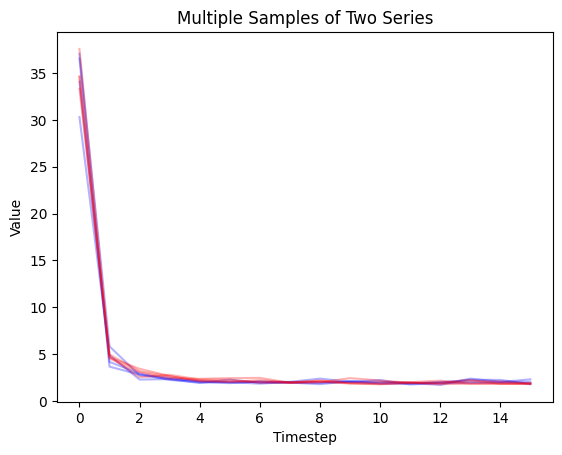

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_competing(runs1, runs2):
    timesteps = np.arange(len(runs1[0]))
    for sample in runs1:
        plt.plot(timesteps, sample, color="blue", alpha=0.3)

    for sample in runs2:
        plt.plot(timesteps, sample, color="red", alpha=0.3)

    plt.xlabel("Timestep")
    plt.ylabel("Value")
    plt.title("Multiple Samples of Two Series")
    plt.show()

plot_competing(l1_eig, l1_cov)

In [ ]:
def competing_timesteps(timesteps, values1_samples, values2_samples,
                        label1="Values 1", label2="Values 2"):
    """
    Plot two sets of sample trajectories (list of lists) as:
      - solid mean lines
      - 95% confidence interval shaded regions

    Parameters
    ----------
    timesteps : list or array
        Shared timesteps.
    values1_samples : list of lists
        Samples for series 1.
    values2_samples : list of lists
        Samples for series 2.
    label1 : str
        Label for the first series.
    label2 : str
        Label for the second series.
    """

    def mean_and_ci(samples):
        arr = np.array(samples)  # (n_samples, n_timesteps)
        mean = arr.mean(axis=0)
        sem  = stats.sem(arr, axis=0)
        ci   = 1.96 * sem
        return mean, mean - ci, mean + ci

    # Compute stats
    mean1, low1, high1 = mean_and_ci(values1_samples)
    mean2, low2, high2 = mean_and_ci(values2_samples)

    # Plot
    plt.figure(figsize=(10, 6))

    plt.plot(timesteps, mean1, label=label1, linewidth=2)
    plt.fill_between(timesteps, low1, high1, alpha=0.3)

    plt.plot(timesteps, mean2, label=label2, linewidth=2)
    plt.fill_between(timesteps, low2, high2, alpha=0.3)

    plt.xlabel("Timestep")
    plt.ylabel("Value")
    plt.title("Competing Timesteps with 95% Confidence Intervals")
    plt.legend()
    plt.grid(True)
    plt.show()